## For opening in colab:
https://colab.research.google.com/drive/1mzQnS6Y9ExXVpB2rTZwVASYSTAaXv6nu?usp=sharing

## CA 0, FMNLP FALL 2023

- **Name: Reyhaneh Ahani**
- **Student ID: 810102353**
##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

##### *Academic honesty*

`We will audit the notebooks of ALL the students. The audits will check that the code you wrote actually generates the answers, and that you actually know how the code works.`

- We will also run automatic checks of notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

## Question 1 (10 points)

#### Question 1.1 (5 points)
Let's begin with a quick probability review. In the task of language modeling, we're interested in computing the **joint** probability of some text. Say we have a sentence $s$ with $n$ words ($w_1, w_2, w_3, \dots, w_n$) and we want to compute the joint probability $P(w_1, w_2, w_3, \dots, w_n$). Assume we are given a model that produces the conditional probability of the next word in a sentence given all preceding words: $P(w_i|w_1,w_2,\dots,w_{i-1})$. How can we use this model to compute the joint probability of sentence $s$?

---


**Write your answer here!** Please include an equation(s) formatted in LaTeX in your answer. You can add LaTeX to your answer by wrapping it in $ signs; see the above cell for examples.

To calculate the joint probability of a sentence using a language model, we apply something called the chain rule of probability. This rule involves finding the probability of each word in the sentence given all the preceding words. Here's how we do it:

1. Start with the first word and determine its individual probability: $P(w_1)$.

2. Then, move on to the second word and find the probability of it following the first word: $P(w_2|w_1)$.

3. Continue this process for each subsequent word in the sentence, considering how likely it is given all the words that came before it: $P(w_i|w_1, w_2, \ldots, w_{i-1})$.

4. Multiply all these individual probabilities together, and that gives you the joint probability of the entire sentence: $P(w_1, w_2, w_3, \ldots, w_n) = P(w_1) \cdot P(w_2|w_1) \cdot P(w_3|w_1, w_2) \cdot \ldots \cdot P(w_n|w_1, w_2, \ldots, w_{n-1})$.





#### Question 1.2 (2 points)
Why would we ever want to compute the joint probability of a sentence? Provide **two** different reasons why this probability might be useful to solve an NLP task.



**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

1. **Language Modeling**: Think of language models as the Sherlock Holmes of NLP. They try to predict what comes next in a sentence. Now, to do that well, they need to know the likelihood of entire sentences, not just individual words. So, by calculating the joint probability, we help these models understand the context better. It's like giving Holmes the whole crime scene instead of just a piece of evidence.

2. **Speech Recognition**: When you're chatting with your virtual assistant or dictating a message, it needs to understand you perfectly. Joint probability helps it by estimating the likelihood of the whole sentence. It figures out that 'weather' in 'What's the weather like?' is more likely than 'whether' because it makes sense in the sentence. So, it's not just about words; it's about the whole picture.


#### Question 1.3 (3 points)
Here is a simple way to build a language model: for any prefix $w_1, w_2, \dots, w_{i-1}$, retrieve all occurrences of that prefix in some huge text corpus (such as the [Common Crawl](https://commoncrawl.org/)) and keep count of the word $w_i$ that follows each occurrence. I can then use this to estimate the conditional probability $P(w_i|w_1, w_2, \dots, w_{i-1})$ for any prefix. Explain why this method is completely impractical!

---

**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

Building a language model by counting word occurrences and probabilities from a large corpus is impractical due to enormous storage and computational requirements, sparsity of data, and the inability to handle dynamic context and new words effectively. Modern language models, like those based on neural networks, are designed to address these challenges and provide more practical and effective language understanding.

## Question 2 (5 points)

#### Question 2.1 (3 points)
Let's switch over to coding! The below coding cell contains the opening paragraph of Daphne du Maurier's novel *Rebecca*. Write some code in this cell to compute the number of unique word **types** and total word **tokens** in this paragraph (watch the lecture videos if you're confused about what these terms mean!). Use a whitespace tokenizer to separate words (i.e., split the string on white space using Python's split function). Be sure that the cell's output is visible in the PDF file you turn in on Gradescope.

---


In [ ]:
paragraph = '''Last night I dreamed I went to Manderley again. It seemed to me
that I was passing through the iron gates that led to the driveway.
The drive was just a narrow track now, its stony surface covered
with grass and weeds. Sometimes, when I thought I had lost it, it
would appear again, beneath a fallen tree or beyond a muddy pool
formed by the winter rains. The trees had thrown out new
low branches which stretched across my way. I came to the house
suddenly, and stood there with my heart beating fast and tears
filling my eyes.'''.lower() # lowercase normalization is often useful in NLP

types = 0
tokens = 0

# YOUR CODE HERE! POPULATE THE types AND tokens VARIABLES WITH THE CORRECT VALUES!
words = paragraph.split()
types = len(set(words))
tokens = len(words)

# DO NOT MODIFY THE BELOW LINE!
print('Number of word types: %d, number of word tokens:%d' % (types, tokens))

Number of word types: 76, number of word tokens:100


#### Counter
Now let's look at the most frequently used word **types** in this paragraph. Write some code in the below cell to print out the ten most frequently-occurring types. We have initialized a [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) object that you should use for this purpose. In general, Counters are very useful for text processing in Python.

---


In [ ]:
from collections import Counter
c = Counter(words)
for word, count in c.most_common(10):
    print(word, count)

i 6
the 6
to 4
a 3
and 3
my 3
it 2
that 2
was 2
with 2


#### Question 2.2 (2 points)
What do you notice about these words and their linguistic functions (i.e., parts-of-speech)? These words are known as "stopwords" in NLP and are often removed from the text before any computational modeling is done. Why do you think that is?

---

**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

The words listed are common words like "I," "to," "the," and "and," which serve as connectors, placeholders, or structural elements in sentences. These are called "stopwords" in NLP. They're often removed from text before analysis because they don't carry significant meaning on their own and are found in abundance in most texts. Removing them helps focus on more meaningful and content-carrying words, making text analysis and modeling more efficient and insightful.

## Question 3 (10 points)


In *neural* language models, we represent words with low-dimensional vectors also called *embeddings*. We use these embeddings to compute a vector representation $\boldsymbol{x}$ of a given prefix, and then predict the probability of the next word conditioned on $\boldsymbol{x}$. In the below cell, we use [PyTorch](https://pytorch.org), a machine learning framework, to explore this setup. If you're finding the PyTorch coding problems difficult, you may want to run through [Pytorch tutorials](https://pytorch.org/tutorials)! `You can not use keras, tensorflow, lightning, HF transformers, HF datasets, fastai.`

In [ ]:
import torch
torch.set_printoptions(sci_mode=False)
torch.manual_seed(0)

prefix = 'Alice talked to'

# spend some time understanding this code / reading relevant documentation!
# this is a toy problem with a 5 word vocabulary and 10-d embeddings
embeddings = torch.nn.Embedding(num_embeddings=5, embedding_dim=10)
## vocab dictionary:
vocab = {'Alice':0, 'talked':1, 'to':2, 'Bob':3, '.':4}

# we need to encode our prefix as integer indices (not words) that index
# into the embeddings matrix. the below line accomplishes this.
# note that PyTorch inputs are always Tensor objects, so we need
# to create a LongTensor out of our list of indices first.
indices = torch.LongTensor([vocab[w] for w in prefix.split()])
prefix_embs = embeddings(indices)
print('prefix embedding tensor size: ', prefix_embs.size())

# okay! we now have three embeddings corresponding to each of the three
# words in the prefix. We add them element-wise to obtain
# a representation of the prefix! We store our answer in a variable named "x".
x = prefix_embs.sum(dim=0)
print('embedding sum: ', x)


prefix embedding tensor size:  torch.Size([3, 10])
embedding sum:  tensor([-0.1770, -2.3993, -0.4721,  2.6568,  2.7157, -0.1408, -1.8421, -3.6277,
         2.2783,  1.1165], grad_fn=<SumBackward1>)


#### Question 3.1 (2 points)
Modern language models do not use element-wise addition to combine the different word embeddings in the prefix into a single representation (a process called *composition*). What is a major issue with element-wise functions that makes them unsuitable for use as composition functions?

---

**Write your answer here!** Please keep it brief (i.e., 2-3 sentences).

A major issue with element-wise addition (or similar element-wise operations) for composing word embeddings into a single representation in modern language models is that it completely disregards the word order and relationships between words in a sentence. Also it doesn't measure how important a word is.

In natural language, the order of words matters significantly in determining the meaning of a sentence. Element-wise operations treat each word independently, which means that their positions and relationships aren't taken into account. As a result, important syntactic and semantic information is lost in this process.

Modern language models use more sophisticated composition functions, such as recurrent neural networks (RNNs), long short-term memory networks (LSTMs), or transformers, which consider the sequence and relationships between words. These models capture contextual information and dependencies among words, making them far more effective for language understanding and generation tasks.

#### Question 3.2 (3 points)
One very important function in neural language models (and for basically every task we'll look at this semester) is the [softmax](https://pytorch.org/docs/master/nn.functional.html#softmax), which is defined over an $n$-dimensional vector $<x_1, x_2, \dots, x_n>$ as $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{1 \leq j \leq n} e^{x_j}}$. Let's say we have our prefix representation $\boldsymbol{x}$ from before. We can use the softmax function, along with a linear projection using a matrix $W$, to go from $\boldsymbol{x}$ to a probability distribution $p$ over the next word: $p = \text{softmax}(W^T\boldsymbol{x})$. Let's explore this in the code cell below:


In [ ]:
# remember, our goal is to produce a probability distribution over the
# next word, conditioned on the prefix representation x. This distribution
# is thus over the entire vocabulary (i.e., it is a 5-dimensional vector).
# take a look at the dimensionality of x, and you'll notice that it is a
# 10-dimensional vector. first, we need to **project** this representation
# down to 5-d. We'll do this using the below matrix:

W = torch.rand(10, 5)

# use this matrix to project x to a 5-d space, and then
# use the softmax function to convert it to a probability distribution.
# this will involve using PyTorch to compute a matrix/vector product.
# look through the documentation if you're confused (torch.nn.functional.softmax)
# please store your final probability distribution in the "probs" variable.

### YOUR CODE HERE
from torch.nn.functional import *

projected_x = torch.matmul(W.t(), x)
probs = softmax(projected_x, dim=0)


### DO NOT MODIFY THE BELOW LINE!
print('probability distribution', probs)

probability distribution tensor([0.0718, 0.0998, 0.1331, 0.6762, 0.0191], grad_fn=<SoftmaxBackward0>)


#### Question 3.3 (5 points)
So far, we have looked at just a single prefix ("Alice talked to"). In practice, it is common for us to compute many prefixes in one computation, as this enables us to take advantage of GPU parallelism and also obtain better gradient approximations (we'll talk more about the latter point later). This is called *batching*, where each prefix is an example in a larger batch. Here, you'll redo the computations from the previous cells, but instead of having one prefix, you'll have a batch of two prefixes. The final output of this cell should be a 2x5 matrix that contains two probability distributions, one for each prefix. **NOTE: YOU WILL LOSE POINTS IF YOU USE ANY LOOPS IN YOUR ANSWER!** Your code should be completely vectorized (a few large computations is faster than many smaller ones).

In [ ]:

# for this problem, we'll just copy our old prefix over three times
# to form a batch. in practice, each example in the batch would be different.
batch_indices = torch.cat(2 * [indices]).reshape((2, 3))
batch_embs = embeddings(batch_indices)
print('batch embedding tensor size: ', batch_embs.size())

# now, follow the same procedure as before:
# step 1: compose each example's embeddings into a single representation
# using element-wise addition. HINT: check out the "dim" argument of the torch.sum function!

# step 2: project each composed representation into a 5-d space using matrix W
# step 3: use the softmax function to obtain a 2x5 matrix with the probability distributions

# please store this probability matrix in the "batch_probs" variable.
composed_reps = torch.sum(batch_embs, dim=1)
print (composed_reps.size())

projected_reps = torch.matmul(W.t(), composed_reps.t())
batch_probs = torch.nn.functional.softmax(projected_reps, dim=0)


#batch_probs = torch.rand(2,5)


### DO NOT MODIFY THE BELOW LINE
print("batch probability distributions:", batch_probs)

batch embedding tensor size:  torch.Size([2, 3, 10])
torch.Size([2, 10])
batch probability distributions: tensor([[0.0718, 0.0718],
        [0.0998, 0.0998],
        [0.1331, 0.1331],
        [0.6762, 0.6762],
        [0.0191, 0.0191]], grad_fn=<SoftmaxBackward0>)


## Question 4) `Hafez` (40 points)

#### 4.1) Read the 'Hafez.txt' file and perform the necessary data cleaning. You should use word-level tokenization (splitting words by space is fine). You should create a dictionary that maps tokens to indices and vice versa (10 points). `Remember, you should not have duplicate tokens in your dictionary.`

In [ ]:
file_path = "/content/sample_data/hafez.txt"
with open(file_path, "r") as file:
  hafez = file.read()

# Deleting all unnecessary data like "\n" and "غزل"
hafez_contents= hafez.split("\n")
hemistichs = [hemistich for hemistich in hafez_contents if len(hemistich) > 12]

startPoint = "[S] "
endPoint = " [E]"
hemistichs = [startPoint + hemistich + endPoint for hemistich in hemistichs]

tokens = []
for hemistich in hemistichs:
  tokens.extend(hemistich.split())

unique_tokens = set(tokens)

# creating dictionary
tti = {}
itt = {}

for index, token in enumerate(unique_tokens):
  if token not in tti:
    tti[token] = [index]
    itt[index] = token

#### 4.2) Before and after each hemistich (مصرع), add [S] and [E] as start and end tokens. Create bigrams from all the text and randomly print 5 of them. (10 points)
three bigram examples: ( ناولها,[E] ), ( کاسا,ادر ) , ( آسان ,عشق)

In [ ]:
# I use these chatGPT prompt for this: how can create a bigram of word from list of words
import random

bigrams = list(zip(tokens, tokens[1:]))
print (random.sample(bigrams,5))

[('کمندها', 'دارند'), ('جوانان', 'عراقی'), ('اگر', 'سجده'), ('[E]', '[S]'), ('مناجات', 'بريم')]


#### 4.3) Choose the 25 most common tokens in the text. Create a bigram heatmap with one token on the y-axis and another token of the bigram on the x-axis. You should create a 25x25 matrix and display the tokens in the squares. Remember that this matrix won't be symmetrical because the order of tokens matters in bigrams. `You are allowed to use any visualization library.` (10 points)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


token_counter = Counter(tokens)
bigram_counter = Counter(bigrams)

top_tokens = [token for token, count in token_counter.most_common(25)]

heatmap_matrix = np.zeros((25, 25), dtype = int)

for i, first_token in enumerate(top_tokens):
  for j, second_token in enumerate(top_tokens):
    heatmap_matrix[i][j] = bigram_counter.get((first_token, second_token), 0)

# For ploting a heatmap using seaborn and matplotlib I use this prompt:
# to to plot a heatmap form a 25 * 25 matrix using seaborn

plt.figure(figsize=(12, 10))
sns.set(font_scale=1)
sns.heatmap(heatmap_matrix, annot=True, fmt='d', xticklabels=top_tokens, yticklabels=top_tokens)

plt.title('Bigram Heatmap of Top 25 Tokens')
plt.show()

#### 4.4) Generate poems using bigram distributions. Start from the [S] token, then generate tokens until you reach the [E] token or reach a total of 30 tokens. Use the following functions for sampling. Print the ten poems you generate using these ten seeds. (5 points).

```python
seeds = list(np.array(your_student_number) + np.array([0,1,2,3,4,5,6,7,8,9])) ## beware broadcasting
for seed in seeds:
    generator = torch.Generator.manual_seed(seed)
    torch.multinomial(generator=generator) ## don't use a token more than once (use the replacement argument)
```

In [ ]:
total_sum = sum(bigram_counter.values())
bigram_distribution = {key: value / total_sum for key, value in bigram_counter.items()}

# To generate the next token based on the bigram distribution, I used ChatGPT and attempted to understand each method and its attributes.

def generate_next_token(bigram_model, current_token, generator):
    possible_bigrams = [(token1, token2) for (token1, token2) in bigram_distribution.keys() if token1 == current_token]
    if not possible_bigrams:
        return '[E]'
    bigram_probabilities = [bigram_distribution[bigram] for bigram in possible_bigrams]
    next_bigram = possible_bigrams[torch.multinomial(torch.tensor(bigram_probabilities), 1, generator=generator).item()]
    return next_bigram[1]

# Generate poems for each seed
seeds = list(np.array(810102353) + np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

for seed in seeds:
    generator = torch.Generator().manual_seed(int(seed))
    current_token = '[S]'
    poem = [current_token]

    while current_token != '[E]' and len(poem) < 30:
        current_token = generate_next_token(bigram_distribution, current_token, generator)
        poem.append(current_token)

    poem_text = ' '.join(poem[1:-1])  # Remove [S] and [E]
    print(poem_text)
    print("\n----------------\n")

#### 4.5) Based on the distribution of bigrams, each bigram has a probability. Calculate the average negative log likelihood of all bigrams. What does this number show? Compare this to a model that generates bigrams completely randomly (a model that doesn't have access to bigram statistics but wants to generate bigrams). (5 points)

In [ ]:
import math

# compute total negetive likelihood
bigram_nll = {}
bigram_nll = {key: -math.log(value) / len(bigram_distribution) for key, value in bigram_distribution.items()}

print(sum(bigram_nll.values()))
print(bigram_nll)

11.081949248796208
{('[S]', 'الا'): 0.00021593361665360705, ('الا', 'يا'): 0.0002647113028838113, ('يا', 'ايها'): 0.0002484520741404099, ('ايها', 'الساقی'): 0.0002647113028838113, ('الساقی', 'ادر'): 0.0002647113028838113, ('ادر', 'کاسا'): 0.0002647113028838113, ('کاسا', 'و'): 0.0002647113028838113, ('و', 'ناولها'): 0.0002647113028838113, ('ناولها', '[E]'): 0.0002647113028838113, ('[E]', '[S]'): 5.2800695001334725e-05, ('[S]', 'که'): 0.00011739137515609682, ('که', 'عشق'): 0.00021906587704216286, ('عشق', 'آسان'): 0.0002647113028838113, ('آسان', 'نمود'): 0.0002484520741404099, ('نمود', 'اول'): 0.0002484520741404099, ('اول', 'ولی'): 0.0002647113028838113, ('ولی', 'افتاد'): 0.0002647113028838113, ('افتاد', 'مشکل\u200cها'): 0.0002647113028838113, ('مشکل\u200cها', '[E]'): 0.0002647113028838113, ('[S]', 'به'): 0.00012853962103453518, ('به', 'بوی'): 0.00019444008537650457, ('بوی', 'نافه\u200cای'): 0.0002647113028838113, ('نافه\u200cای', 'کاخر'): 0.0002647113028838113, ('کاخر', 'صبا'): 0.0002647

For each bigram, this number indicates how well your language model can predict the observed bigram in a given text. Lower values demonstrate better performance for our model, while higher scores suggest a struggle for our model to predict the next word accurately, as seen in the case of ([E], [S]).

In a completely random scenario, all probabilities are the same, and our models cannot capture patterns and relationships within your data. The generated poems are more random. However, by using the NLL method, we can achieve better results.

## Question 5 (15 points + 15 extra points)

We Want to Implement a small part of the paper [Bengio et al, 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf). We use Hafez dataset. use `torch.nn.embedding` to convert each token index to 60 dimensional embeddings.
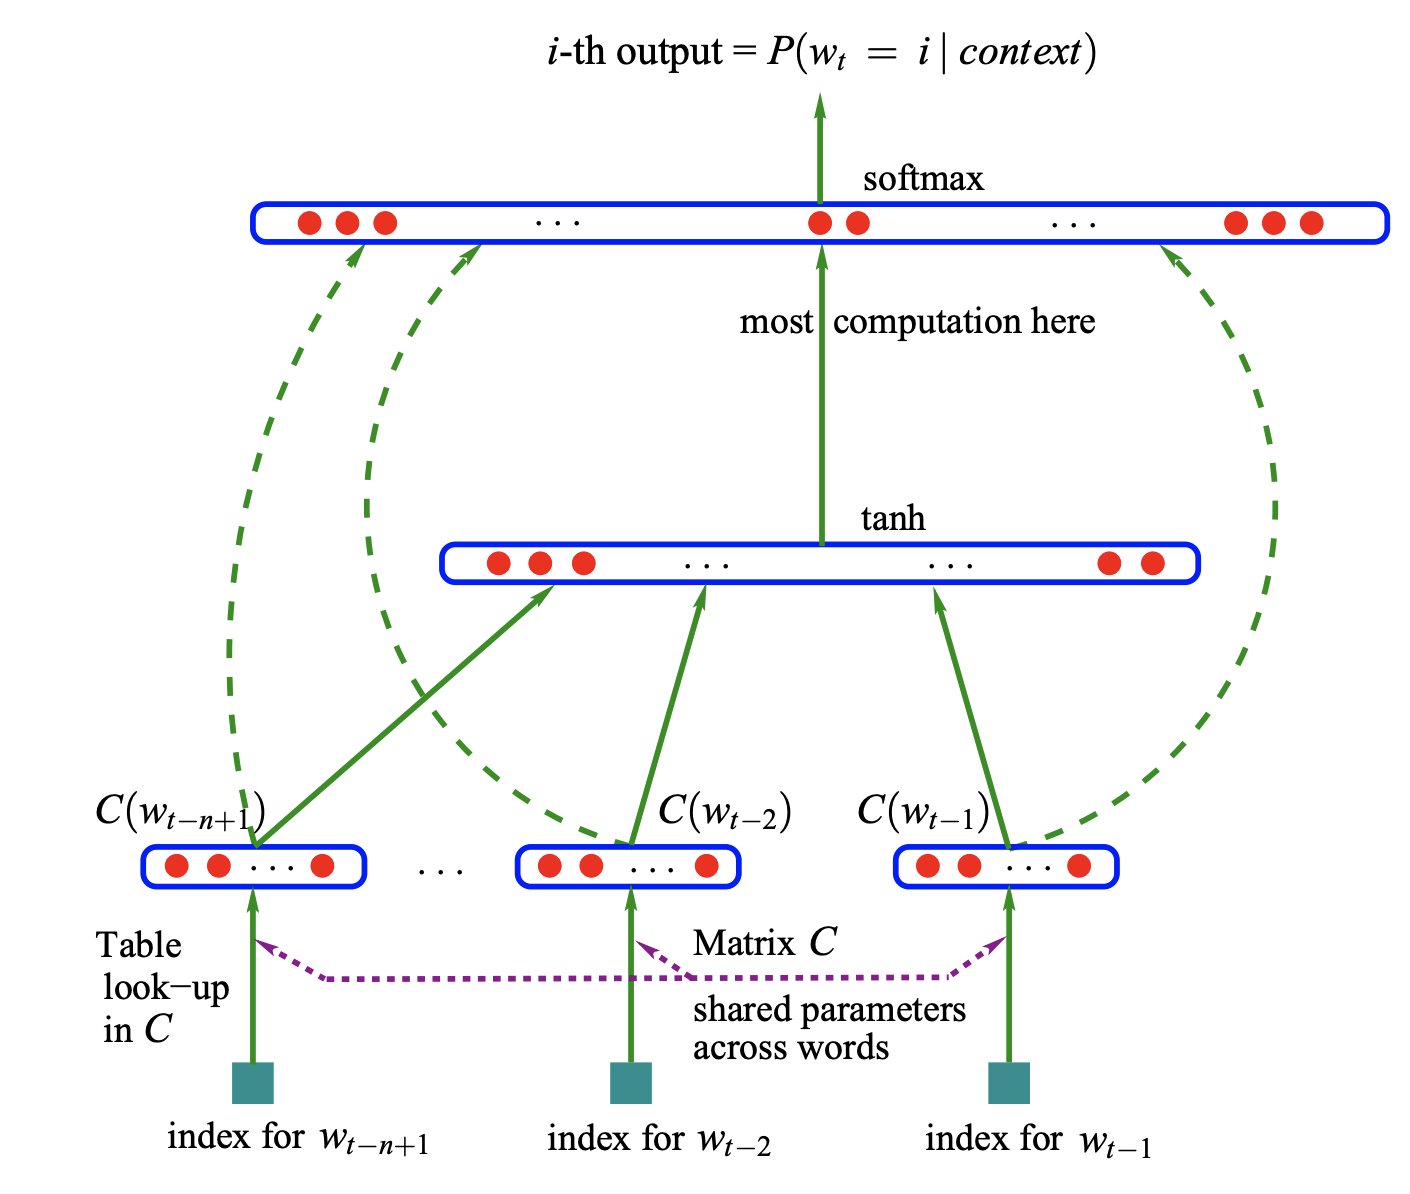

#### 5.1) implement the simple MLP in the paper using pytorch. there is only one hidden layer with tanh nonlinearity. plot the losses for train and test data. use 80/20 split. (no need to implement the dashed green line paths) (15 points)

In [ ]:
# For spliting the data I use chat GPT
# I have a list of three-object tuples and I want to split
# the first two as training data and the last object as the label,
# and I want to split it into an 80/20 ratio for the training and test sets.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


class NPLM(nn.Module):

    def __init__(self, vocab_size, n_gram = 3, embedding_dim = 60, hidden_dim = 50):
        super(NPLM, self).__init__()

        self.vocab_size = vocab_size
        self.n_gram = n_gram
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.hidden_layer = nn.Linear(embedding_dim, hidden_dim)
        self.tanh = nn.Tanh()
        self.output_layer = nn.Linear(hidden_dim, vocab_size)


    def forward(self, input):

        embedded = self.embeddings(input)
        embedded_sum = torch.sum(embedded, dim=1)

        hidden_output = self.tanh(self.hidden_layer(embedded_sum))

        output = self.output_layer(hidden_output)
        output_probs = F.log_softmax(output, dim=1)
        max_output = torch.max(output_probs, 1)

        return max_output

In [ ]:
vocab_size = len(tti)

model = NPLM(vocab_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
from sklearn.model_selection import train_test_split

ngrams = list(zip(tokens, tokens[1:], tokens[2:]))

features = torch.tensor([[tti[token[0]], tti[token[1]]] for token in ngrams], dtype = torch.long)
labels = torch.tensor([tti[token[2]] for token in ngrams])

print(features.size())
print(labels.size())

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

torch.Size([79610, 2, 1])
torch.Size([79610, 1])


In [ ]:
num_epochs = 1  # Define the number of training epochs
for epoch in range(num_epochs):
    # Forward pass
    output_probs = model(features)
    # Compute the loss
    loss = criterion(output_probs, labels)
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


#### 5.2) implement the dashed green lines in the figure. compare with 5.1 (15 extra points)

For adding skip connection we can simply change the NPLM class to the following and nothing changes

In [1]:
class NPLM_SkipConnection(nn.Module):

    def __init__(self, vocab_size, n_gram = 3, embedding_dim = 60, hidden_dim = 50):
        super(NPLM_SkipConnection, self).__init__()

        self.vocab_size = vocab_size
        self.n_gram = n_gram
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.hidden_layer = nn.Linear(embedding_dim, hidden_dim)
        self.tanh = nn.Tanh()
        self.output_layer = nn.Linear(hidden_dim, vocab_size)

        self.skip = nn.Linear(embedding_dim, vocab_size)

    def forward(self, input):

        embedded = self.embeddings(input)
        embedded_sum = torch.sum(embedded, dim=1)

        hidden_output = self.tanh(self.hidden_layer(embedded_sum))

        output = self.output_layer(hidden_output)
        skip_connection = self.skip(embedded_sum)
        final_output = output + skip_connection

        output_probs = F.log_softmax(final_output, dim=1)
        max_output = torch.max(output_probs, 1)

        return max_output

NameError: ignored

## Question 6 (20 points)

Choose  one  paper from [ACL 2023 (Volume 1: Long Papers)](https://aclanthology.org/events/acl-2023/#2023acl-long) that you find interesting. A good way to do this is by scanning the titles and abstracts; there are hundreds of papers so take your time before selecting one!  Then, write a summary in  your own words of the paper you chose. Your summary should answer the following questions: what is its motivation? Why should anyone care about it? Were there things in the paper that you didn't understand at all? What were they? Fill out the below cell, and make sure to write 2-4 paragraphs for the summary to receive full credit!
`You can not copy and paste anything from the paper or even paraphrasing the paper for that matter. You should read the paper, and then write your own understanding of the paper.`

**Title of paper**: Diverse Headline Generation using Self-Attention based Keyword Selection

**Authors**: Venkatesh E, Kaushal Kumar Maurya,
Deepak Kumar and Maunendra Sankar Desarkar

**URL**: https://aclanthology.org/2023.findings-acl.118.pdf

**Your summary**:
The main idea was to consolidate various headlines into a single article while ensuring that all the headlines remain significant. The challenge of generating multiple similar outputs in natural language processing is well-known, and this challenge falls under the subcategory of one-to-many generation. Since the article employs news datasets, previous models for generating text aren't directly applicable, as they might deviate from the main theme of the news.

To address this, the authors introduced their models. Firstly, they employed the self-attention heads of the last layer of the pre-trained encoder to extract the most important keywords. Subsequently, they applied additional transfer learning methods. They concatenated information from the news article, the theme, and general keywords, passing it to encoder-decoder models to generate diverse headlines.

Following a brief introduction, the authors delve into the description of their models, providing detailed insights into each of the two main components. While I grasp most of the KEYSELECT part, where attention heads group keywords into clusters, I found the explanation of creating diversifying attributes and the SEQGEN section somewhat challenging to comprehend.

The paper proceeds to the experimental section, initially discussing the dataset they created and its features. They also introduce their evaluation metrics, which were somewhat confusing to me, as they were new to my understanding. The metrics used include BLEU-4, ROUGE-L, BERTScore, and BARTScore, which evaluate lexical and semantic matching. An important point the paper highlights is the trade-off between performance and diversity.


## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * *your response here*


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * *your response here*
*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * *your response here*

